# Практика по спектроскопии 

## Введение

На этой практике вам предстоит детектировать разные газы в атмосфере Марса. Спектроскопия - один из стандартных для этого методов. Достоинство спектроскопии заключается в том, что оно позволяет дистанционно измерять присутствие и характеристики разных газов в атмосфере Марса. Часто, это помимо использование методов спектроскопии, требует [сложных методов обработки данных](https://ru.wikipedia.org/wiki/%D0%9E%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%B0%D1%8F_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0). Мы же будем использовать более простую форулировку задачи для *[in situ](https://en.wikipedia.org/wiki/In_situ)* экспериментов, таких как роверы. В таких случаях часто используют специальное хранилище газа &mdash; кювету &mdash; нагнетают туда газ из атмосферы под большим давлением и измереяют его спектр поглощения. 
\
\
Схема нашего эксперимента выглядит так: 
![Схема](scheme.png)

Поглощение света рассчитывается по [формуле Бугера-Лаберта-Бера](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%91%D1%83%D0%B3%D0%B5%D1%80%D0%B0_%E2%80%94_%D0%9B%D0%B0%D0%BC%D0%B1%D0%B5%D1%80%D1%82%D0%B0_%E2%80%94_%D0%91%D0%B5%D1%80%D0%B0): 
$$
\Large\ T = e^{-k n l}
$$
Где $T$ &mdash; пропускание газа, то есть доля света, проходящего через среду. Значения пропускания **1** означает что свет на этой длине волны проходит полностью и не поглощается молекулами газа. Значение **0** означает что весь свет поглотился газом, и не прошло ни одного фотона света. $l$ &mdash; оптический путь, который проходит свет сквозь среду, в нашем случае свет много раз отражается в зеркалах в кювете, и проходит гораздо больший путь чем длина кюветы. $n$ &mdash; относительное содержание газа (в долях от единицы), а $k$ &mdash; коэффициент поглощения. Коэффициент поглощения это величина, которая пропорциональна поглощению молекулами газа, и зависит от температуры, давления и других параметров вещества. **В вашем распряжении будут данные, которые очень близки к реальным спектрам с Марса и сечения поглощения каждого газа и вам нужно удет подобрать концетрацию так, чтобы она описывала этот спектр.**
\
\
Как и на всех других практиках, вокруг вас находятся волонтеры и люди готовые ответить на любой ваш вопрос. **Пожалуйста, не стесняйтесь спрашивать их вопросы по заданию!**
\
\
Обратите внимание, что на школу приходят участники с разным уровнем опыта программирования. Если это ваши первые шаги в программировании, вам может быть сложно и у вас может не все получатся. Это совершенно нормально: вам вовсе не обязательно делать всю практику, и любой прогресс в этом задании можно считать успехом!  

## Часть первая: спектр около места посадки Mars2020
### Загрузка данных

Мы сгенерировали для вас спектры, которые могли бы быть измерены в районе посадки трех марсоходов: _Сuriosity_, _Mars 2020_ (_Perseverance_) и _Zhurong_. Далее, мы попробуем выяснить сколько в каждом из спектров различных газов.
\
\
Для загрузки данных проще всего использовать функцию `load_data`, которую мы специально подготовили для Летней Школы. В директории `astrophysics` лежит короткая инструкция по использованию этой и других базовых функций (файл `lkshpy-manual.ipynb`), в которую можно и нужно подглядывать, когда у вас возникают вопросы. Для начала нужно ее импортировать. Напомним, что для того чтобы выполнить ячейку с кодом нужно выбрать ее курсором и нажать кнопку `Run` с треугольничком в верней части экрана или комбинацию клавиш `ctrl`+`enter`.

In [1]:
from lksh import load_data

Давайте попробуем загрузить данные для вашего первого задания. Мы используем функцию `load_data` для загрузки данных в переменные `wavelength` и `t`. Для этого мы указываем в качестве аргумента функции `load_data` полный путь до файла, включая папки в которых он находится:

In [2]:
wavelength, t = load_data('data/Mars2020/spectrum.txt')

Файл, из которого мы работаем находится в директории `astrophysics/spectroscopy`, и в этой же директории есть папка `data`, а в ней `Mars2020`. \
\
*Примечение: Такое указание пути называется относительным, потому что оно происходит относительно файла откуда мы запускаем код. Дальше вам нужно будет самим загружать данные и указывать пути до них!*

Давайте попробуем построить того как выглядят эти данные. Сначала импортируем нужную функцию:

In [3]:
from lksh import plot

Теперь построим график. Напоминаем, что функция `plot` работает так: вы ее вызываете, и указываете в скобках два значения через запятую, первое значание это данные по оси x, а второе - по оси y:

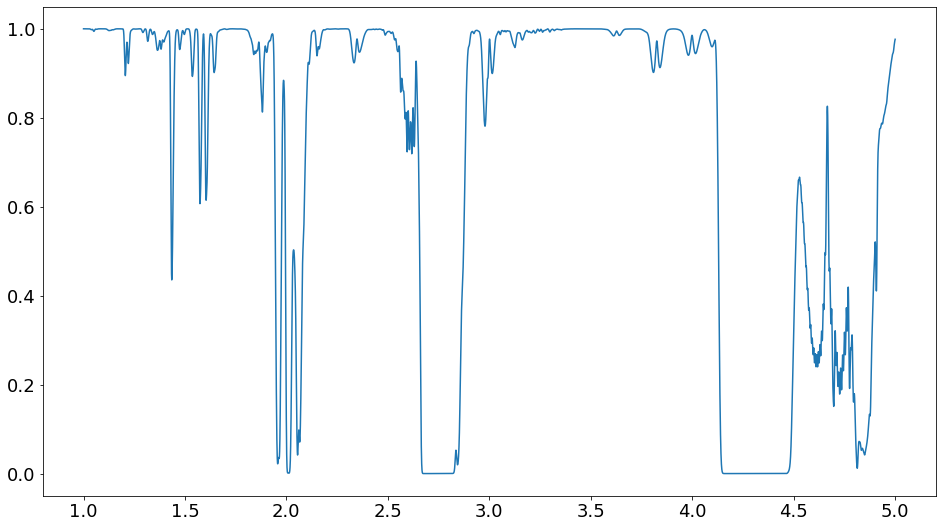

In [4]:
plot(wavelength, t)

Когда вы рисуете графики очень важно указывать что отображено по осям, давайте подпишем. Вы можете посмотреть описание данных открыв файл в приложении "Блокнот". Впишите в внизу в коде кавычках что указано по оси x и что указано по оси y:

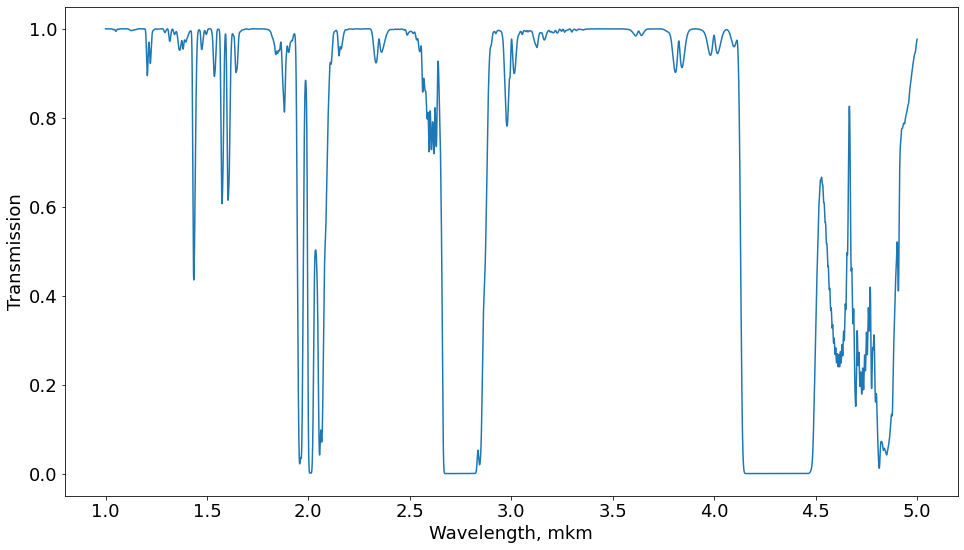

In [5]:
plot(wavelength, t, xlabel='Wavelength, mkm', ylabel='Transmission') # Замените фразы в кавычках на 
                                                                          # описание из файла

## Моделирование пропускания
В модуле `lksh` есть функция `transmission` которая позволяет промоделировать пропускание атмосферы в заданной локации. Давайте посмотрим как она работает:

In [6]:
from lksh import transmission

В качестве первого аргумента нужно указать локацию ( `Сuriosity`, `Mars2020` или `Zhurong`), остальные же аргументы отвечают за массовую долю компонентов Марсианской атмоферы. По умолчанию, `CO2=0.96`, что равно 96 процентам CO$_2$ в Марсианской атмосфере, а `H2O=0.001`, то есть 0.1% водяного пара. Остальные газы: `CH4` , `CO`, `HDO`, `HCl`, `O2`, `O3` равны нулю по умолчанию:

In [7]:
wavelength_model, model = transmission('Mars2020')

Посмотрим, насколько наша модель, в которой учитывается только CO$_2$ и H$_2$О описывает Марсианскую атмосферу: 

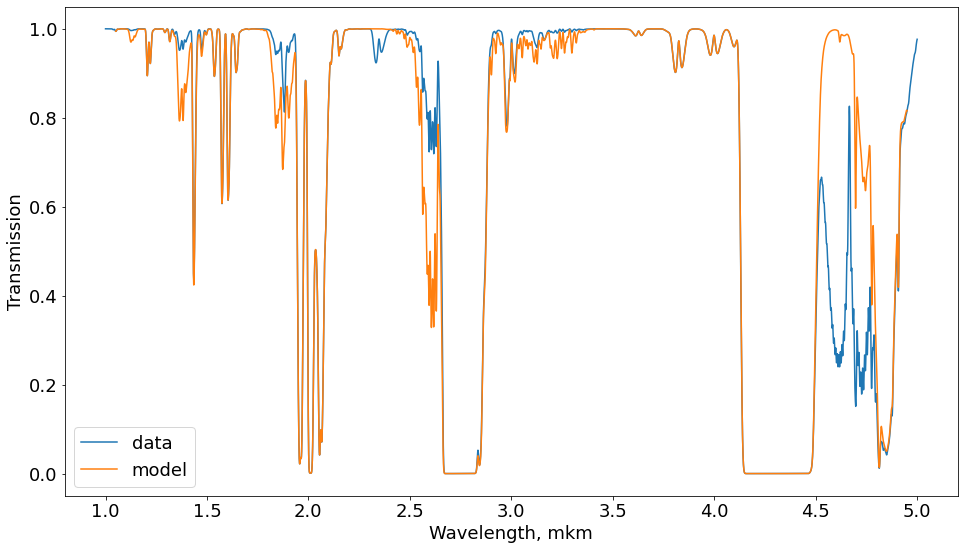

In [8]:
plot(wavelength, t, xlabel='Wavelength, mkm', ylabel='Transmission', label='data') # подпишите правильно графики, 
                                                    # вписав подходящее описание в label
plot(wavelength_model, model, label='model')

- Хорошо ли совпадают графики? 
- Подберите значения концентраций `CO2`, `H2O` и `CO` в данных так, чтобы они совпадали с данными

In [9]:
wavelength_model, model = transmission('Mars2020', CO2=0.96,   # впишите после пустых знаков "равно"
                                        H2O=0.00011, CO=0.0007)             # значения концентрации
                                                               # и да, в python можно так переносить строки:)


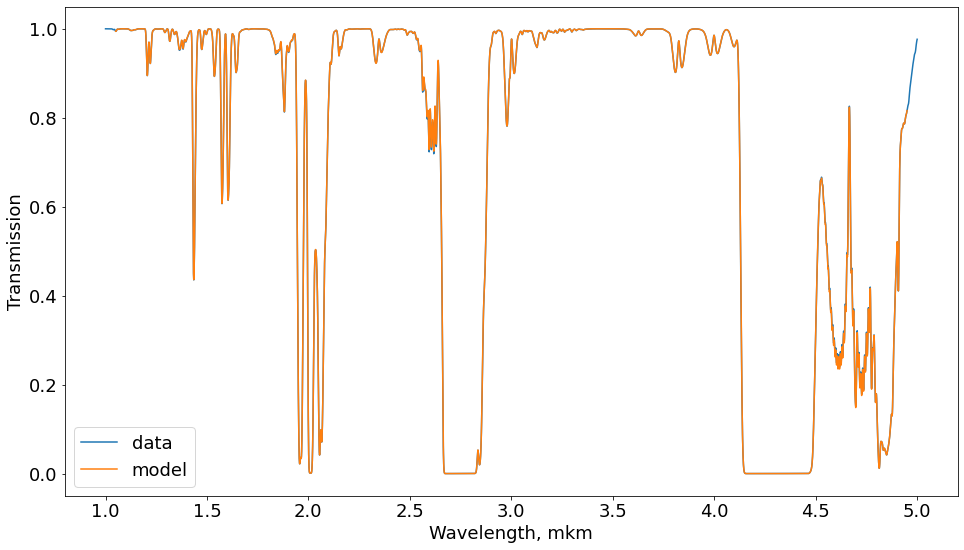

In [10]:
plot(wavelength, t, xlabel='Wavelength, mkm', ylabel='Transmission', label='data')
plot(wavelength_model, model, label='model')

## Часть вторая: место посадки Curiosity

Ровер Curiosity находится в кратере Гейла на Марса. Несколько раз он детектировал метан с помощью прибора TLS. Эти и другие детектирование находятся на пределе возможностей прибора, и не подтверждены более мощными приборами, которые измеряют метан в средней и верхней атмосфере. Одна из гипотез заключается в том, что источник метана находится где-то около поверхности, а его появление носит сезонный характер. Представим себе, что наш прибор измеряет именно в момент хорошего содержания метана.

In [11]:
wavelength, t = load_data('data/Curiosity/spectrum.txt')

Возможно, вам будет удобнее выделить полосу поглощения метана на графике и работать только с ней. Для этого можно использовать функции `xlim` и `ylim`:

In [12]:
from lksh import xlim, ylim

Каждая из них принимает два аргумента: минимальное и максимальное значение. Функция `xlim` ограничивает график этими значениями по оси x, а функция `ylim` по оси y. Найдите в модели полосу метана задав большие значения концентрации, а потом попробуйте выделить ее с помощью функций `xlim` и `ylim`:

In [20]:
wavelength_model, model = transmission('Curiosity', CO2=0.96,   # впишите после пустых знаков "равно"
                                        CH4=0.0001)                   # значения концентрации

# xlim(минимум, максимум) # замените минимум и максимум на границы полосы метана
# ylim(минимум, максимум) # можно ограничить и значения по y чтобы приблизить данные

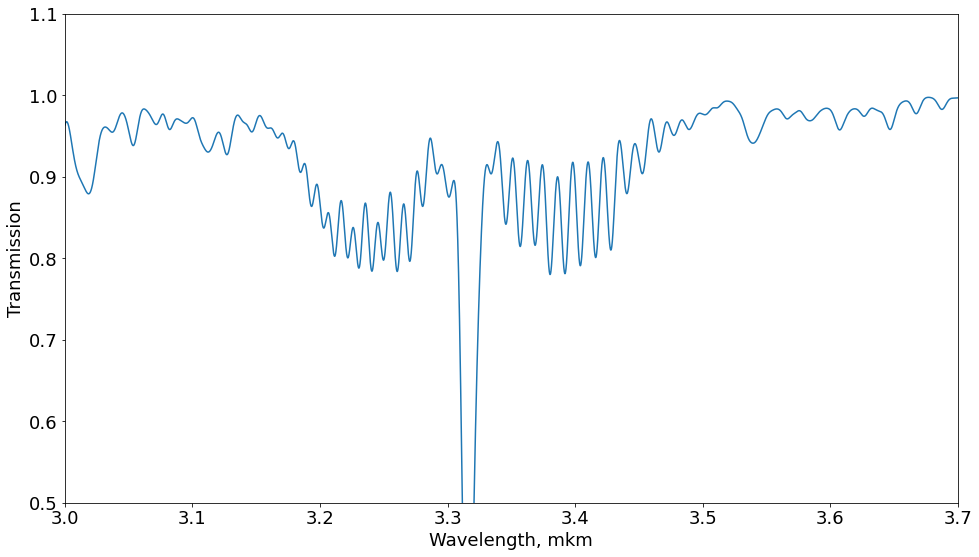

In [26]:
plot(wavelength_model, model, xlabel='Wavelength, mkm', ylabel='Transmission')
xlim(3, 3.7)
ylim(0.5, 1.1)

- Попробуйте найти метан и определить его концетрацию в данных с места посадка Curiosity

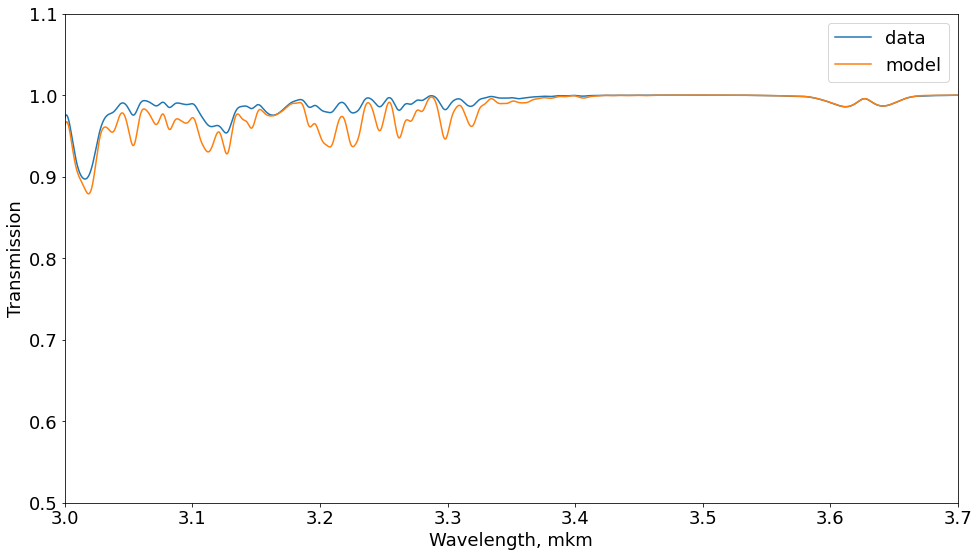

In [31]:
wavelength_model, model = transmission('Curiosity', CO2=0.96, CH4=0.0000002)
plot(wavelength, t, xlabel='Wavelength, mkm', ylabel='Transmission', label='data')
plot(wavelength_model, model, label='model')
xlim(3, 3.7)
ylim(0.5, 1.1)

- (\* здесь и далее звездочка означает необязательное задание) Попробуйте найти концетрации других малых газов в этом и предыдущем спектрах  

## Часть третья: место посадки Zhurong и спектры высокого разрешения

До этого мы использовали данные низкого разрешения. Такие данные более наглядные, однако, работая с более высоким разрешением, можно детектировать гораздо меньшие доли компонентов . 
- Попробуйте поменять значение параметра `r`, который отвечает за разрешение спектрометра. Попробуйте значения `r` в `1000` (стандартное), `5000`, `10000` и `20000`.

In [34]:
wavelength_model, model = transmission('Zhurong', CO2=0.96,   # впишите после пустых знаков "равно"
                                        r=10000)                   # значения r
                                                              # посмотрите как выглядит разные газы
                                                              # в высоком спектральном разрешении

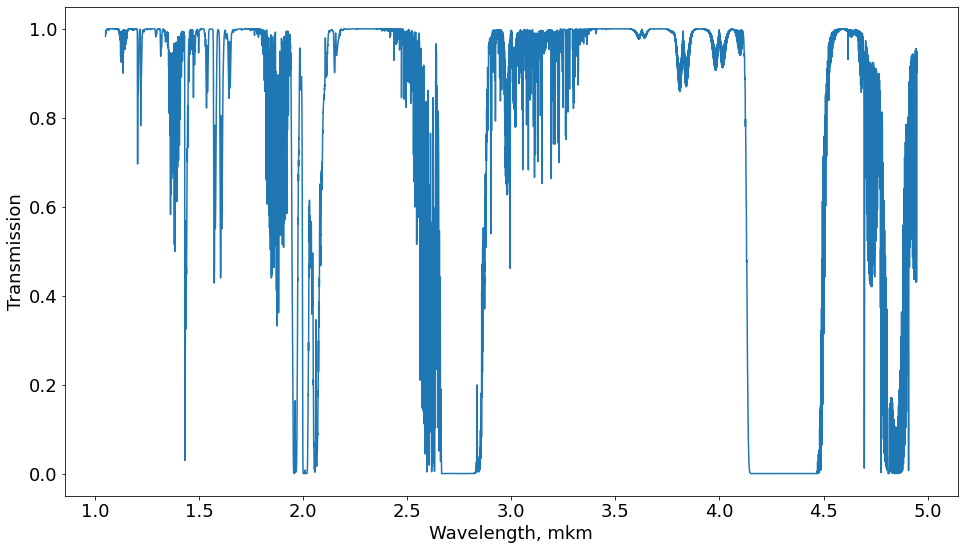

In [35]:
plot(wavelength_model, model, xlabel='Wavelength, mkm', ylabel='Transmission')

In [37]:
wavelength_model, model = transmission('Zhurong', CO2=0.96, H2O=0.01, r=10000) 

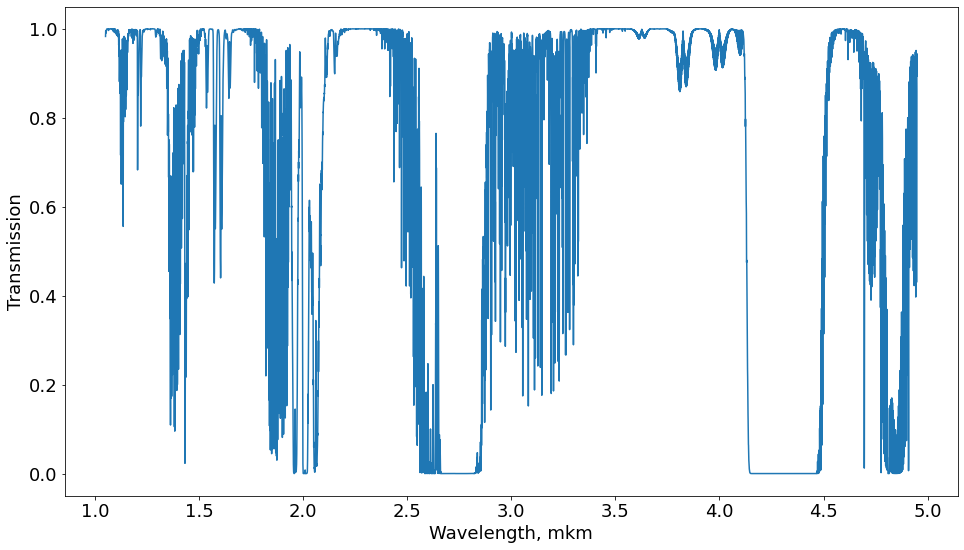

In [38]:
plot(wavelength_model, model, xlabel='Wavelength, mkm', ylabel='Transmission')

Теперь попробуем поработать со спектром высокого разрешения и восстановим значение водяного пара (`H2O`) из данных.
- Определите концетрацию водяного пара из данных в файле `data/Zhurong/spectrum.txt`. В этих данных `r=10000`

In [39]:
# загрузите данные используя функцию load_data
wavelength, t = load_data('data/Zhurong/spectrum.txt')

In [46]:
wavelength_model, model = transmission('Zhurong', CO2=0.96, H2O=0.0005, r=10000) 

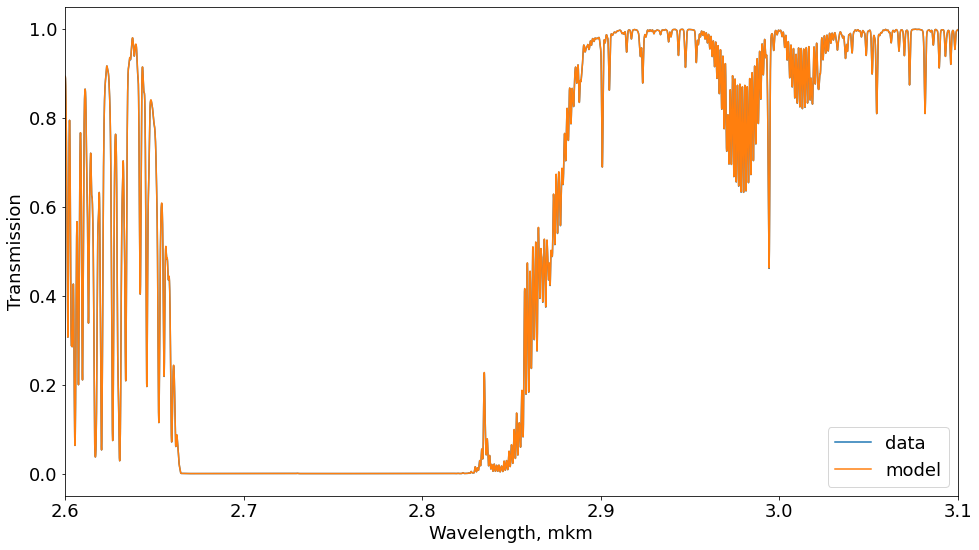

In [47]:
plot(wavelength, t, xlabel='Wavelength, mkm', ylabel='Transmission', label='data')
plot(wavelength_model, model, label='model')
xlim(2.6, 3.1)

- (\*) Попробуйте найти концетрации других малых газов в этом спектре